# EDA about "houses price web Scraping Mexico" dataset  

Through EDA, we first get familiar with the dataset, clean it and find relationships between its features (columns). It was performed using Python over a dataset from Kaggle (https://www.kaggle.com/datasets/jeanpierrebetancourt/houses-price-web-scraping-mexicopresented). The analysis consists of four sections. \
In the first section, packages and data were loaded. After the loadings, I defined functions. In the next section, we can get familiar with the data, for example, knowing the nature of variables, statistics, and if there are missing values. The third section is about modifying data, for example, dropping some non-use columns or outliers values. At the same time, are shown data distributions and statistical visualizations. After some changes to the data, we found some relationships in the "Relationship analysis" based on the correlation matrix, which could be used to determine the next analysis in this case to impute missing values.  Finally, some conclusions and details for further analysis are presented.


### 0. Loading packages and data. Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

__Functions__

In [2]:
def diagonal_matrix(matrix):
    """ This function show the inferior diagonal values of the correlation matrix
        Arguments
        matrix: dataset use to compute the correlation matrix and to show only the inferior diagonal 
        Return
        The inferior diagonal values of the correlation matrix
    """
    matrix = matrix.corr()
    mask = np.zeros_like(matrix, dtype=bool) #array of zeros with the same shape and type as correlation_data
    mask[np.triu_indices_from(mask)] = True            #overrides the data type
    matrix[mask] = np.nan                    #convert the upper diagonal of the matrix with Nan values
    return (matrix
     .style
     .background_gradient(cmap='Reds', axis=None, vmin=-1, vmax=1)
     .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
     .set_precision(2))

In [3]:
def d_gamma(data, feature):
    """Fitting the data with a Gamma distribution
       Args
         data: (dataframe column) feature of the dataset to fit, continuous variable 
         feature: (string) the name of the dataframe column to fit
         Return
         Plot with two curves, one for the data and for the fit values
         NOTES 
           * If data has missing values the method could rise an error, then we drop those values.
           * We use the median value of the data as a firts guess for the distribution's location
         
    """
    [a_fit, loc_fit, scale_fit] = scipy.stats.gamma.fit(data.dropna(), loc= X.median())  
    #print("The fitting parameters are: \n{} \n{} \n{}".format(a_fit, loc_fit, scale_fit))
    x = np.linspace(min(X), max(X), num = 1646)            #array of x values, in the same range for area values
    X.plot(kind="kde", label ="Data")          #density curve for Area
    s=feature + ' Distribution for the data_4 dataset'
    plt.title(s)
    plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc= loc_fit, scale= scale_fit), label ="Fitting Gamma")
                                           #gamma dsitribution
    plt.legend()
    plt.show()
    print("#############################\np-value:\n", scipy.stats.kstest(X, 'gamma', args=(a_fit, loc_fit, scale_fit))[1])

In [4]:

def loss_function(params, data_in):
    """
    The discrete distributions in scipy.stats don't have the fit method, then we are going to develop a method to get the fitting parameters
    For the Poisson Distribution it is only required one value, the median
    Arguments
      Params: it could be more than one parameter
      data_in: data to fit
      
    NOTE the goal is to find the parameter mu that minimizes the loss, i.e. minimizes how far off our distribution is from our dataset 
    """
    mu = params[0]       #standar name
    loss = 0
    #The idea behind this is the log likelihood that is a measure of how likely it is to  see your data point given some underlying distribution
    #Here we are basically taking the log to make the numbers just easier to deal with
    data=data_in
    loglikelihood=0
    for i in range(len(data)):
        loglikelihood = scipy.stats.poisson.logpmf(data[i], mu)
        #since it is a loss function we would like to maximize it 
        loss_to_add = -loglikelihood
        loss += loss_to_add
    return(loss)

_________________________________________
__Loading data__

In [5]:
#loading data 
data = pd.read_csv("Casa_toluca.csv")

### 1. Getting familiar with data (Data information)

In [6]:
#first rows (records)
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Ubicación,Area,Baños,Habitaciones,Precio
0,0,0,0,"Casa en Venta Los Serrados\n, Toluca De Lerdo,...",105.0,2.0,3.0,130000.0
1,1,1,1,"Casa en Venta Tierra Y Libertad #114\n, Toluca...",115.0,2.0,3.0,50800.0
2,2,2,2,"Casa en Venta Toluca De Lerdo, México",700.0,3.0,3.0,325000.0
3,3,3,3,"Casa en Venta Granjas, Toluca De Lerdo",390.0,3.0,4.0,275000.0
4,4,4,4,"Casa en Venta Toluca De Lerdo, México",300.0,4.0,3.0,215000.0


In [7]:
#last records
data.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Ubicación,Area,Baños,Habitaciones,Precio
1999,1999,1999,1999,"Casa en Venta Toluca De Lerdo, México",190.0,NaN,NaN,60775.0
2000,2000,2000,2000,"Casa en Venta Toluca De Lerdo, México",92.0,NaN,NaN,62330.0
2001,2001,2001,2001,"Casa en Venta Toluca De Lerdo, México",66.0,NaN,NaN,47500.0
2002,2002,2002,2002,"Casa en Venta Toluca De Lerdo, México",42.0,NaN,NaN,13695.0
2003,2003,2003,2003,"Casa en Venta Toluca De Lerdo, México",NaN,NaN,NaN,270250.0


* It seems like the first three columns are equal to the index, then we can remove them
* Maybe we could split Ubicación and do some deep analysis related with the pice or other attribute
* There are missing values in "Area", "Baños", and "Habitaciones" columns 
__ _________________________________________________________________________________________________________________ __

In [8]:
#DataFrame dimension
data.shape

(2004, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2004 non-null   int64  
 1   Unnamed: 0.1    2004 non-null   int64  
 2   Unnamed: 0.1.1  2004 non-null   int64  
 3   Ubicación       2004 non-null   object 
 4   Area            1721 non-null   float64
 5   Baños           1950 non-null   float64
 6   Habitaciones    1931 non-null   float64
 7   Precio          1999 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 125.4+ KB


It will be necessary to handle missing values or delete (2004-1721) records\
The percentage of missing values is:\
Area            14.1217 %\
Baños           2.6946 %\
Habitaciones    3.6427 %\
Precio          0.2495 %\
Considering this percentages we wont need to drop any of these columns
__ _________________________________________________________________________________________________________________ __

In [10]:
#related statistics about the numerical columns
data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Area,Baños,Habitaciones,Precio
count,2004.000000,2004.000000,2004.000000,1721.000000,1950.000000,1931.000000,1.999000e+03
mean,1001.500000,1001.500000,1001.500000,229.525857,2.496923,3.306059,1.690472e+05
std,578.649289,578.649289,578.649289,337.245195,3.093504,1.512319,4.067087e+05
min,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.065305e+04
25%,500.750000,500.750000,500.750000,113.000000,2.000000,3.000000,5.162500e+04
50%,1001.500000,1001.500000,1001.500000,165.000000,2.000000,3.000000,9.075000e+04
75%,1502.250000,1502.250000,1502.250000,250.000000,3.000000,4.000000,1.600000e+05
max,2003.000000,2003.000000,2003.000000,11111.000000,124.000000,40.000000,1.000000e+07


Some observations: 
* Number of rooms could be change to int
* For Area the mean value is less than the median value (50%) 
* Also we can see a large difference between 70% and max values fro the columns of interest (Area, Baños, Habitaciones, and Precio)
* The last two points suggest the outliers presence in our dataset
__ _________________________________________________________________________________________________________________ __

### 2. Changing data. Distributions and more Statistics

__Unique values__

In [11]:
#checking for unique values
data.nunique()

Unnamed: 0        2004
Unnamed: 0.1      2004
Unnamed: 0.1.1    2004
Ubicación         1274
Area               323
Baños               16
Habitaciones        17
Precio             748
dtype: int64

Then, there are 16 unique values for bathrooms which would seem a rare value for this attribute. This will be treated later
__ _________________________________________________________________________________________________________________ __

In [12]:
#for a specific column of interest
data['Baños'].unique()

array([  2.,   3.,   4.,  nan,   8.,   1.,   5.,   7.,   6.,  23.,   9.,
        13.,  25.,  10.,  11.,  20., 124.])

________________________________________________
__Drop columns or rows__

In [13]:
#dropping the first three columns as we identified before the first three don't have usuful information
data = data.drop(["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1"], axis=1)
data.head(10)

,Ubicación,Area,Baños,Habitaciones,Precio
0,"Casa en Venta Los Serrados\n, Toluca De Lerdo,...",105.0,2.0,3.0,130000.0
1,"Casa en Venta Tierra Y Libertad #114\n, Toluca...",115.0,2.0,3.0,50800.0
2,"Casa en Venta Toluca De Lerdo, México",700.0,3.0,3.0,325000.0
3,"Casa en Venta Granjas, Toluca De Lerdo",390.0,3.0,4.0,275000.0
4,"Casa en Venta Toluca De Lerdo, México",300.0,4.0,3.0,215000.0
5,"Casa en Venta Toluca De Lerdo, México",250.0,2.0,3.0,125000.0
6,"Casa en Venta Toluca De Lerdo, México",600.0,4.0,4.0,1000000.0
7,"Casa en Venta Toluca De Lerdo, México",NaN,4.0,4.0,220000.0
8,"Casa en Venta Toluca De Lerdo, México",300.0,4.0,3.0,210000.0
9,Casa en Venta Ejido Santa Cruz Azcapotzaltongo...,NaN,NaN,NaN,137500.0


__Missing values__ \
I know that it is possible do nothing with the missing values since it is an exercise to do EDA, but to practice lets do some handling of missing values

In [14]:
#looking for null values
pd.isnull(data).sum()

Ubicación         0
Area            283
Baños            54
Habitaciones     73
Precio            5
dtype: int64

We have several missing values, then we will look for how many records have at least one missing value.
__ _________________________________________________________________________________________________________________ __

In [15]:
#Looking for rows with at least one misssing value
data[data.isnull().any(axis=1)].shape

(346, 5)

Then we have 17.2654% of records with at least one missing values. \
On the other hand we have 283 missing values of Area, and as we will see in the ___relationship analysis___ section this attribute has a non-negligible correlation with the price. \
And I am assuming that for a hipotetical analysis of this kind of dataset _price_ is the variable to know or predict\
For what was explain above I am going to drop the 283 missing-area values. Also, it is only for the case in which I am only doing some EDA.
__ _________________________________________________________________________________________________________________ __

In [16]:
#drop rows with missing values for area
data_1 = data.dropna(subset=["Area"])
pd.isnull(data_1).sum()

Ubicación        0
Area             0
Baños           36
Habitaciones    56
Precio           5
dtype: int64

__--------------------->__               __data_1__                    __<---------------------__ \
dataset after drop missing values for Area attribute

In [17]:
#New dataset
data_1.shape

(1721, 5)

__ _________________________________________________________________________________________________________________ __
Handling outliers for area

,Area,Baños,Habitaciones,Precio
count,1721.000000,1685.000000,1665.000000,1.716000e+03
mean,229.525857,2.524036,3.262462,1.617801e+05
std,337.245195,3.289322,1.518774,4.175500e+05
min,10.000000,1.000000,1.000000,1.065305e+04
25%,113.000000,2.000000,3.000000,4.822430e+04
50%,165.000000,2.000000,3.000000,8.500000e+04
75%,250.000000,3.000000,3.000000,1.550000e+05
90%,400.000000,4.000000,4.000000,2.833675e+05
95%,600.000000,4.000000,5.000000,5.036250e+05
98%,800.000000,5.000000,6.000000,8.705000e+05


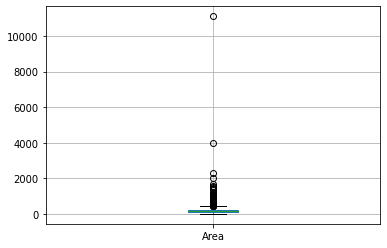

In [18]:
#visualizing outliers for area
data_1.boxplot(column = "Area")
#Some statistics for the new dataset and specific percentiles, paying special atention on _area_
data_1.describe(percentiles= [0.5, 0.25, 0.75, 0.90, 0.95, 0.98, 0.99])

In [19]:
#Defining a threshold to drop outliers for area
q_threshold=data_1["Area"].quantile(.99)    
#For Q-99 for area is equal to 980 and if we remove records with values > q_threshold, then we will lose 1% of the data 
print("{} is the treshold to filter the outliers for area".format(q_threshold))

980.0 is the treshold to filter the outliers for area


In [20]:
data_2=data_1[data_1["Area"] < q_threshold]     #new dataset

__--------------------->__               __data_2__                    __<---------------------__ \
dataset after filtering outliers for Area attribute

In [21]:
data_2.shape                                    #looking into the size of the new dataset

(1702, 5)

Here we lost 19 extra records
_____________________________________________________________________________________________________________________________

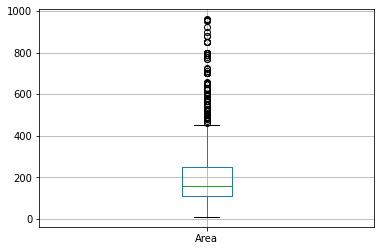

<function matplotlib.pyplot.show(close=None, block=None)>

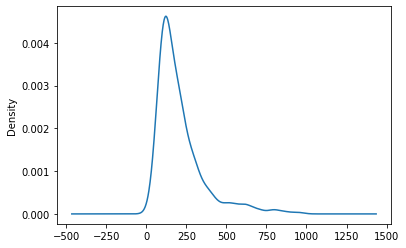

In [22]:
#visualizing the new data for area
data_2.boxplot(column = "Area")
plt.show()
data_2["Area"].plot(kind="kde")
plt.show

Here we can se a right skewed distribution

_______________________________________________________________________
Now, handling the "Baños" column. I picked this column because I supposed the number of bathrooms in a house cannot be a large number in general terms (but it is possible to have some extraordinary cases). Also, this idea is supported by the mean value for such column.\
Then lets do some wrangling.

<AxesSubplot:>

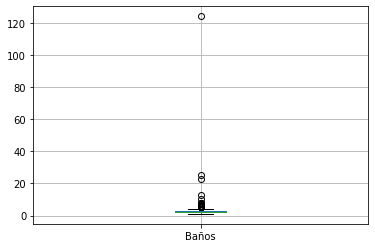

In [23]:
#First do some charts to determine outliers
data_2.boxplot(column = "Baños")

From the last plot it is possible to see some outliers > media, then we can eliminate eliminate those records. Also, we can examine those records, but for now just drop them, and see the boxplot\
To handle this outliers we will again look into the percentiles
______________________________________________________

In [24]:
#First I tried using the quantile 95 and analyze the corresponding value  
q_threshold_b=data_2["Baños"].quantile(.99)    
# we will lose 1% of the data 

__--------------------->__               __data_3__                    __<---------------------__ \
dataset after drop missing values for Baño attribute

<AxesSubplot:>

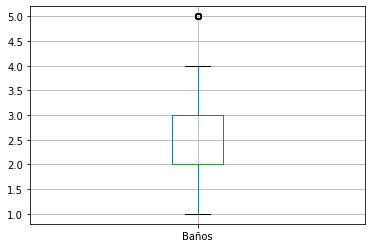

In [25]:
data_3=data_2[data_2["Baños"] < q_threshold_b]           #New dataset filtering Baños-outliers
data_3.boxplot(column = "Baños")

<AxesSubplot:ylabel='Frequency'>

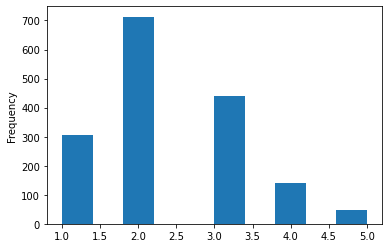

In [26]:
#Now if we can plot a distribution for Baños column
data_3["Baños"].plot(kind="hist", bins = 10)

From the histogram we can see it is a right skewed distribution, then it wont be a good idea to use the mean value to replace the missing values

In [27]:
#Computing the mean and median values
print(data_3.Baños.mean(), data_3.Baños.median())

2.3377885783718106 2.0


As it was expected the median seems to be a better approximation for the missing values \
But for now we will keep that values because maybe we can find a proportial relationship between bathrooms and rooms and replace missing values with such number or use another technique to impute that values
_______________________________________________

Now, we can visualize the same plots for the Habitaciones and Precio columns, and compare the curves for the original dataset against the new __data_3__ dataset

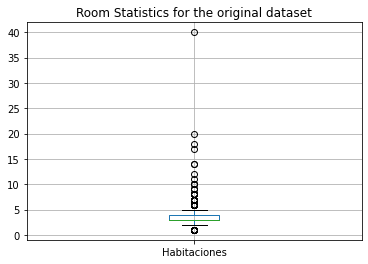

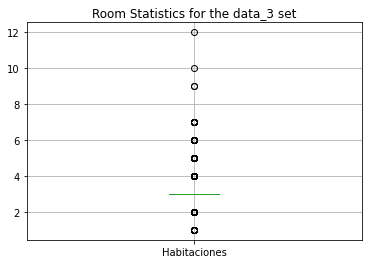

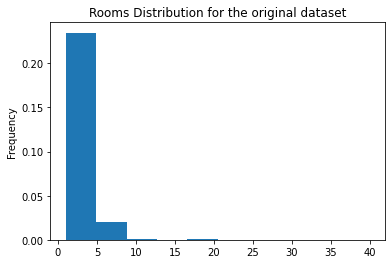

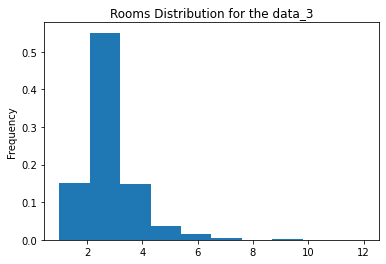

In [28]:
#do the same process for rooms
#First do some charts to determine outliers
#Statistics
data.boxplot(column = "Habitaciones")                #plot using the entire dataset
plt.title("Room Statistics for the original dataset")
plt.show()
data_3.boxplot(column = "Habitaciones")             #plot using the dataset with filtered outliers for bathrooms 
plt.title("Room Statistics for the data_3 set")
plt.show()
#discrete distribution
data["Habitaciones"].plot(kind="hist", bins = 10, density=True)  #density=True ensures to have get area under the curve equal to one   
plt.title("Rooms Distribution for the original dataset")
plt.show()
data_3["Habitaciones"].plot(kind="hist", bins = 10, density=True)
plt.title("Rooms Distribution for the data_3")
plt.show()

From the first two plots we can visualize the outliers for #of rooms using both dataset, but there are readuced using the new __data_3__ set
While checking the histograms both are right skewed distribution, but the __data_3__ plot is less narrow.
_____________________________________

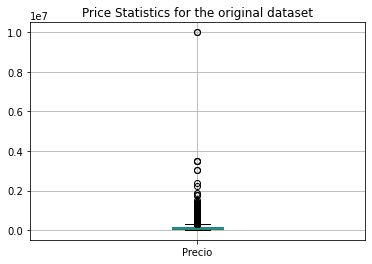

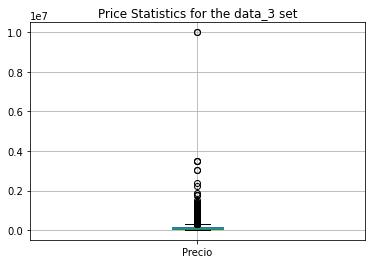

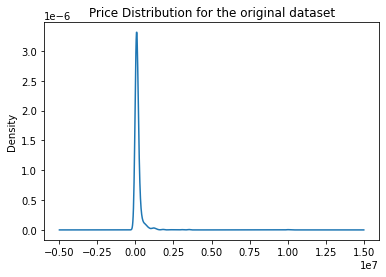

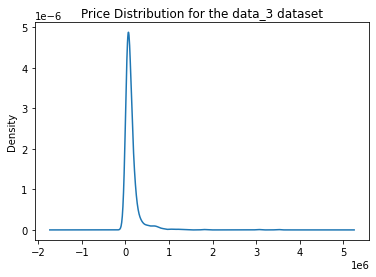

In [29]:
#do the same process for prices
#First do some charts to determine outliers

#statistics 
data.boxplot(column = "Precio")                 #plot using the entire dataset
plt.title("Price Statistics for the original dataset")
plt.show()
data.boxplot(column = "Precio")                 #plot using the dataset with filtered outliers for bathrooms 
plt.title("Price Statistics for the data_3 set")
plt.show()
#Density distribution
data["Precio"].plot(kind="kde")
plt.title("Price Distribution for the original dataset")
plt.show() 
data_3["Precio"].plot(kind="kde")
plt.title("Price Distribution for the data_3 dataset")
plt.show()

In this case for both datasets we can observe a narrow right skewed distribution for the price attribute

_________________

### 3. Relationship analysis

__Correlations between features__ \
__.corr()__ is a method to find the correlation coefficients, it excludes NaN values automatically\
it is based on:\
pearson: standard correlation coefficient (by default)\
kendall: Kendall Tau correlation coefficient \
spearman: Spearman rank correlation

<AxesSubplot:>

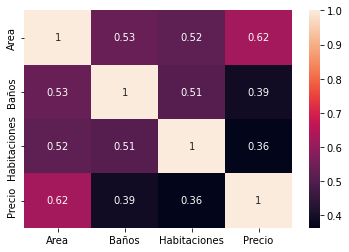

In [30]:
##To find some relationships between features we find the correlation matrix, using the pearson method
#https://www.sciencedirect.com/topics/computer-science/pearson-correlation
correlation_data = data_3.corr() #it returns the correlation coefficients between features
##Visualizing the correlation coefficient values 
sns.heatmap(correlation_data, annot =True)
#plt.matshow(data.corr())
#plt.colorbar()
#plt.show()

From the correlation matrix, we can see a significant correlation between Area and Price which makes sense because more area, more cost. 
___________________

Also we can compare between correlation for both original and new datasets

In [31]:
diagonal_matrix(data)                 #Original dataset

,Area,Baños,Habitaciones,Precio
Area,nan,nan,nan,nan
Baños,0.12,nan,nan,nan
Habitaciones,0.28,0.22,nan,nan
Precio,0.44,0.14,0.26,nan


In [32]:
diagonal_matrix(data_3)              #New data_3 set

,Area,Baños,Habitaciones,Precio
Area,nan,nan,nan,nan
Baños,0.53,nan,nan,nan
Habitaciones,0.52,0.51,nan,nan
Precio,0.62,0.39,0.36,nan


We can see increments for all correlation coeficients, it could be a good indicator for this first aproaching to the data (filtering by area and number of bathrooms) \
It makes sense because more area costs more money and more rooms require more bathrooms, for example.
__________________________________________

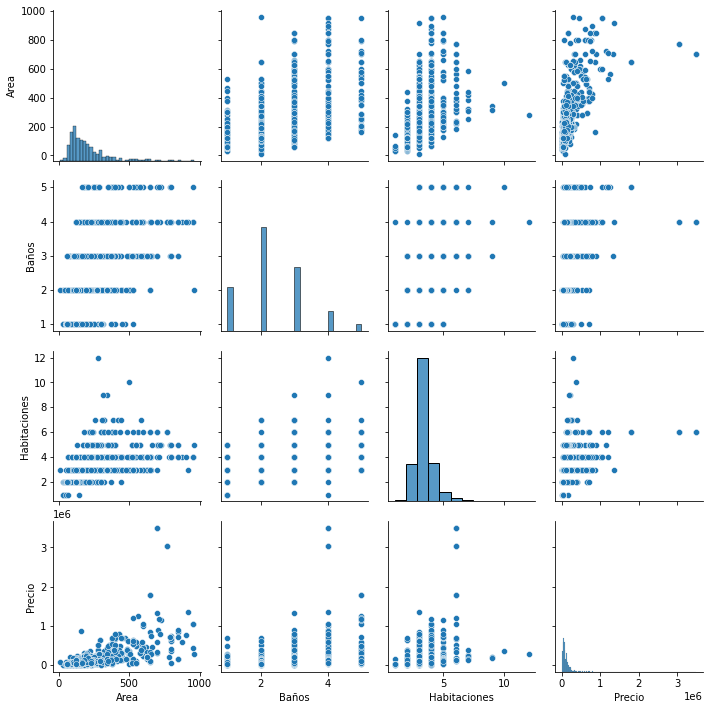

In [33]:
##another (only) visualization for the relationship
sns.pairplot(data_3)                                 #it shows in a grid the correlations between numerical features

From the last plot grid we can see right skewed distributions for all numerical attibutes.\
All numerical afeaturesttributes have positive correlations under Pearson method \
In the case Precio-Area it seems that data could be describe by a curve more than with a line
___________________________________________________

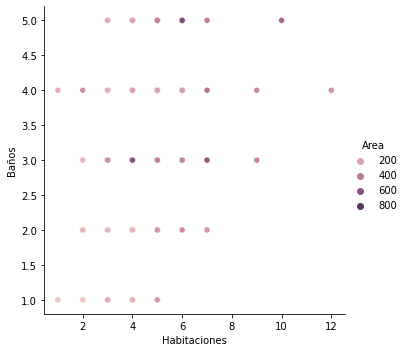

In [34]:
#to see specific columns
sns.relplot(x ='Habitaciones', y ='Baños', hue = 'Area', data= data_3)
#the hue could be any categorical attribute

From this plot we can see how for more rooms (more house habitants) it is necessary to have more bathrooms and then the area increases 
________________________________

Missing data of the Habitaciones for the __data_3 set__

In [35]:
#missing data
pd.isnull(data_3).sum()

Ubicación        0
Area             0
Baños            0
Habitaciones    22
Precio           5
dtype: int64

In [36]:
#Looking into the missing values for patterns or relations 
print(data_3.shape)
data_3[data_3.isnull().any(axis=1)]

(1646, 5)


,Ubicación,Area,Baños,Habitaciones,Precio
50,"Casa en Venta Toluca De Lerdo, México",566.0,5.0,NaN,1250000.0
218,Casa en Venta Prolongacion Laguna Del Volcan S...,400.0,3.0,NaN,185000.0
265,"Casa en Venta San Buenaventura, Toluca De Lerdo",102.0,2.0,NaN,55000.0
343,"Casa en Venta Insurgentes\n, Capultitlán, Tolu...",210.0,2.0,NaN,90000.0
379,"Casa en Venta Independencia 1\n, San Mateo Otz...",80.0,1.0,NaN,61500.0
602,"Casa en Venta Prolongación Paseo Totoltepec\n,...",69.0,1.0,NaN,62500.0
762,"Casa en Venta Ahuehuetes, Toluca De Lerdo",91.0,1.0,NaN,85000.0
888,"Casa en Venta Toluca De Lerdo, México",170.0,2.0,NaN,124000.0
946,"Casa en Venta Privada Fuente De La Luz 117\n, ...",130.0,1.0,NaN,69750.0
978,"Casa en Venta Altamirano 16\n, San Mateo Oxtot...",480.0,4.0,NaN,173500.0


In [37]:
#The histogram for this Habitaciones is almost symetrical, then we expected than the mean and the median values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
print("For Habitaciones: \nMean value = {} \nmedian value = {}".format(round(data_3.Habitaciones.mean(),2), round(data_3.Habitaciones.median(), 2) ) )

For Habitaciones: 
Mean value = 3.16 
median value = 3.0


I think the mean and median values for Habitaciones is quite similar, but only to practice lets perform a imputer model, in this case we will use KNN method.\
This method imputes for completing missing values using k-Nearest Neighbors.
In this case we use "Habitaciones", "Area" and "Baños" columns. We are not considering Precio because it is suppose to be predicted, in a whole Analysis, which is not the case for this EDA.\
In KNN each missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

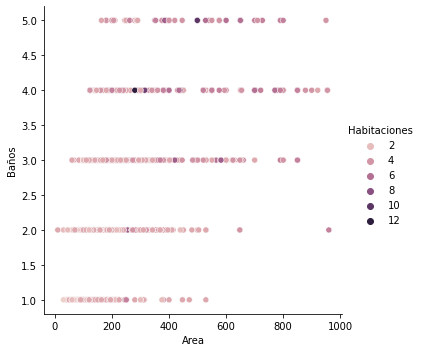

In [38]:
#We can see the relationship between area, bathrooms and romms
sns.relplot(x ='Area', y ='Baños', hue = 'Habitaciones', data= data_3)
#the hue could be any categorical attribute

(1646, 3) (1646, 3)


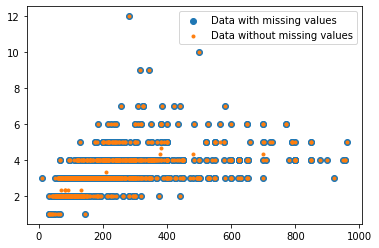

In [39]:
#Using KNN
from sklearn.impute import KNNImputer                            #import the imputer 
fea_transformer = KNNImputer(n_neighbors=3)                      # Setting the number ot nearest neighbors as 3, 6, 12, 24 
X=data_3[["Area", "Baños", "Habitaciones"]]                      #selecting the dataframe portion that contains some missing values
values = fea_transformer.fit_transform(X)                        #imputing missing values for the data of interest
plt.scatter(data_3.Area, data_3.Habitaciones, label='Data with missing values')
plt.scatter(data_3.Area, values[:, 2], marker= '.', label='Data without missing values')
plt.legend()
values.shape
print(X.shape, values.shape)

__--------------------->__               __data_4__                    __<---------------------__ \
dataset after imputing "Habitaciones" missing values by using KNN method

In [40]:
#Now we can calculate the correlation matrix using the new values 
data_4=data_3.drop("Habitaciones", axis = 1)
data_4["Habitaciones"]=values[:, 2]
data_4 = data_4.reindex(columns=['Ubicación', 'Area', 'Baños', 'Habitaciones', 'Precio'])
data_4

,Ubicación,Area,Baños,Habitaciones,Precio
0,"Casa en Venta Los Serrados\n, Toluca De Lerdo,...",105.0,2.0,3.0,130000.0
1,"Casa en Venta Tierra Y Libertad #114\n, Toluca...",115.0,2.0,3.0,50800.0
2,"Casa en Venta Toluca De Lerdo, México",700.0,3.0,3.0,325000.0
3,"Casa en Venta Granjas, Toluca De Lerdo",390.0,3.0,4.0,275000.0
4,"Casa en Venta Toluca De Lerdo, México",300.0,4.0,3.0,215000.0
...,...,...,...,...,...
1976,"Casa en Venta Toluca De Lerdo, México",60.0,1.0,2.0,30000.0
1977,"Casa en Venta Toluca De Lerdo, México",120.0,2.0,2.0,35000.0
1980,"Casa en Venta Toluca De Lerdo, México",294.0,3.0,3.0,100000.0
1981,"Casa en Venta Toluca De Lerdo, México",353.0,5.0,5.0,105000.0


We can compare the correlation coeficients after imputting the missing values fro Habitaciones

In [41]:
diagonal_matrix(data_3)                # data_3 set

,Area,Baños,Habitaciones,Precio
Area,nan,nan,nan,nan
Baños,0.53,nan,nan,nan
Habitaciones,0.52,0.51,nan,nan
Precio,0.62,0.39,0.36,nan


In [42]:
diagonal_matrix(data_4)                 # data_4 set

,Area,Baños,Habitaciones,Precio
Area,nan,nan,nan,nan
Baños,0.53,nan,nan,nan
Habitaciones,0.52,0.51,nan,nan
Precio,0.62,0.39,0.37,nan


Filling missing data increase the correlation between Habitaciones-Precio
______________________________________

Now, lets fitting distribution for some data in data_3, notice that there are discrete and continuous variables

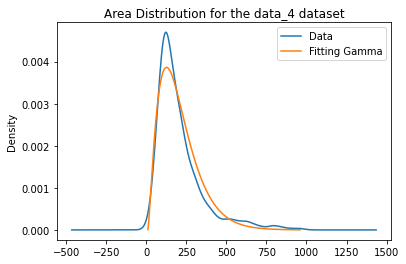

#############################
p-value:
 1.988263204514379e-10


In [43]:
#fitting a gamma distribution using the d_gamma function 
X = data_4["Area"]                         #data set to fitting
d_gamma(X, "Area")                         #calling function  d_gamma function 

c:\users\crgbl\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\optimize.py:734: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


The mu parameter is: 3.0


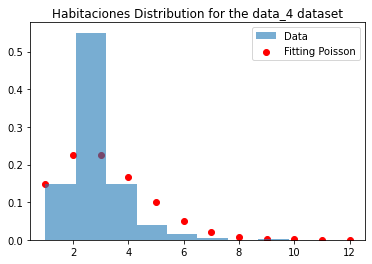

#############################
p-value:
 0.0


In [44]:
#fitting a poisson distribution
X = data_4["Habitaciones"]                      #data set to fitting  
X=X.reset_index(drop= True)                     #we need to reset the index, because in the past steps we have been dropping some rows, but the index is not updated
                                                #to avoid errors in the for loop of the loss_function
#showing the histogram for Habitaciones
plt.hist(X, bins=10, density=True, alpha= 0.6, label ="Data")
#Finding the fitting parameters
params0 = np.array([3])                         #value to be the first guess, in the case of a Poisson Distribution this parameter is equal to the median value
minimum = scipy.optimize.fmin(loss_function, params0, args=(X,))   # Minimizing the loss function
mu_fit= minimum[0]                              #better mu value (median in this case) after minimizing the loss function
print("The mu parameter is:", mu_fit)
#to visualize this fitting 
x = list(range(int(np.min(X)), int(np.max(X))+1))  #array of x values, in the same range for area values
plt.scatter(x, scipy.stats.poisson.pmf(x, mu_fit), color= "red", label ="Fitting Poisson")          #density curve for Area
plt.title("Habitaciones Distribution for the data_4 dataset")
plt.legend()
plt.show()
print("#############################\np-value:\n", scipy.stats.kstest(X, scipy.stats.poisson.pmf(x, mu_fit))[1])

_____________________________________

### 4. Conclusions

I performed EDA over a dataset of house prices from Toluca.The data was retrieved from Kaggle and provided by Jean Pierre Betancourt.

The dataset has some columns to drop and several outliers and missing values. Some techniques were used to handle each situation.

Several data tendencies and relationships were found and described.

For further analysis it might be consider:
* The relationship "Area-Precio" as a function of the "Ubicación"
* A data normalization before performing KNN since it uses euclidian distance metric to find the nearest neighbors